##### 이산형 확률분포

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats, integrate
from scipy.optimize import minimize_scalar
import scipy as sp
from scipy.special import factorial
from matplotlib import rc
rc('font',family='Malgun Gothic') # 한글 인코딩
plt.rcParams['axes.unicode_minus'] = False # 음수 부분 처리
plt.style.use('seaborn')


In [ ]:
# 1차원 이산확률분포
x_set = np.array([1,2,3,4,5,6])

def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0
X = [x_set,f]


In [ ]:
prob = np.array([f(x_k) for x_k in x_set])
print(prob,'\n')
dict(zip(x_set,prob))

[0.04761905 0.0952381  0.14285714 0.19047619 0.23809524 0.28571429] 



{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

<BarContainer object of 6 artists>

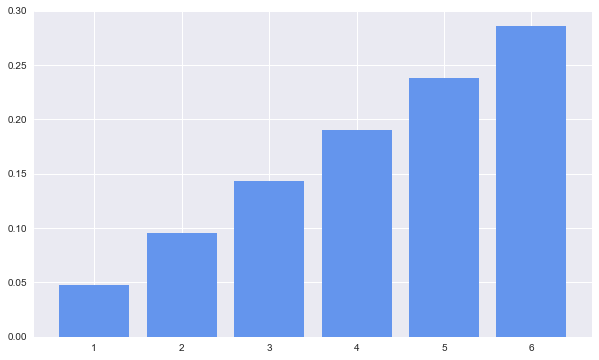

In [ ]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.bar(x_set,prob,color = 'cornflowerblue')

In [ ]:
np.all(prob>=0)

True

In [ ]:
np.sum(prob)

0.9999999999999999

In [ ]:
# 누적분포함수
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [ ]:
F(6)

0.9999999999999999

In [ ]:
# 확률변수의 변환 : 확률변수 X에 2를 곱하고 3을 더한 2X+3도 확률변수가 된다.
y_set = np.array([2*x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set,prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

In [ ]:
# 1차원 이산형 확률변수의 지표
# 평균 : 확률변수의 평균은 확률변수의 중심을 나타내는 지표가 되며 기댓값이라고도 부른다
np.sum([x_k * f(x_k) for x_k in x_set])

4.333333333333333

In [ ]:
# 확률변수와 기댓값은 확률변수를 무제한 시행하여 얻은 실현값의 평균
sample = np.random.choice(x_set,int(1e6),p=prob)
np.mean(sample)

4.331781

In [ ]:
# 일반화
def E(X,g=lambda x:x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [ ]:
E(X)

4.333333333333333

In [ ]:
E(X, g=lambda x: 2*x+3)

11.666666666666664

In [ ]:
# 기댓값의 선형성
2 * E(X) + 3

11.666666666666666

In [ ]:
# 분산
mean = E(X)
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])

2.2222222222222223

In [ ]:
# 일반화
def V(X, g=lambda x:x):
    x_set,f = X
    mean = E(X,g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

In [ ]:
V(X)

2.2222222222222223

In [ ]:
V(X, lambda x:2*x+3)

8.88888888888889

In [ ]:
# 분산의 선형성
# V(aX+b) = (a**2)*V(X)가 성립함을 보인다. (상수는 생략됨에 유의)
2**2*V(X)

8.88888888888889

In [ ]:
# 2차원 이산형 확률분포
x_set = np.arange(2,13)
y_set = np.arange(1,7)

In [ ]:
def f_XY(x,y):
    if 1 <= y <= 6 and 1 <= x-y <= 6: # x-y는 주사위 B의 눈을 의미하니 범위가 이렇게 됨
        return y * (x-y) / 441 # 한눈에 이해하려면 (y/21) * ((x-y)/21)
    else:
        return 0
XY = [x_set,y_set,f_XY]

C:\Users\admin\AppData\Local\Temp/ipykernel_6512/1752771940.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  c = ax.pcolor(prob)
C:\Users\admin\AppData\Local\Temp/ipykernel_6512/1752771940.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(c,ax=ax)


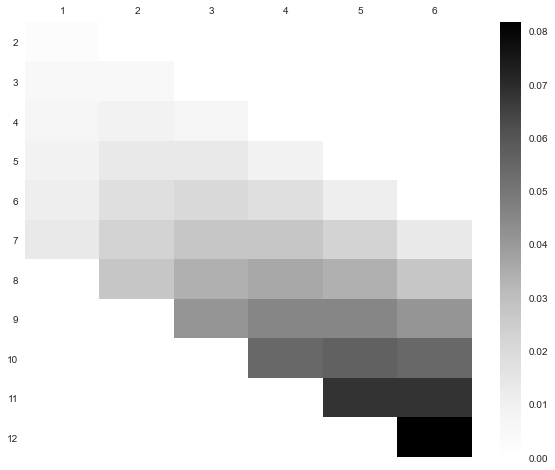

In [ ]:
prob = np.array([[f_XY(x_i,y_j) for y_j in y_set] for x_i in x_set])
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1])+0.5,minor=False)
ax.set_yticks(np.arange(prob.shape[0])+0.5,minor=False)
ax.set_xticklabels(np.arange(1,7),minor=False)
ax.set_yticklabels(np.arange(2,13),minor=False)
# y축을 내림차순의 숫자가 되게 하여, 위 아래를 역전시킨다
ax.invert_yaxis()
# x축 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()
fig.colorbar(c,ax=ax)
plt.show()

In [ ]:
np.all(prob>=0)

True

In [ ]:
np.sum(prob)

1.0

In [ ]:
# 주변확률분포 : 확률변수 (X,Y)는 결합확률분포에 의해 동시에 정의되지만 개별 확률변수에만 흥미가 있을 수 있다
# 확률변수 X만의 움직임. 즉 확률변수 X의 확률함수를 알고 싶은 상황

In [ ]:
def f_X(x):
    return np.sum([f_XY(x,y_k) for y_k in y_set])

In [ ]:
def f_Y(y):
    return np.sum([f_XY(x_k,y) for x_k in x_set])

In [ ]:
X = [x_set, f_X]
Y = [y_set, f_Y]

In [ ]:
X

[array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <function __main__.f_X(x)>]

In [ ]:
Y

[array([1, 2, 3, 4, 5, 6]), <function __main__.f_Y(y)>]

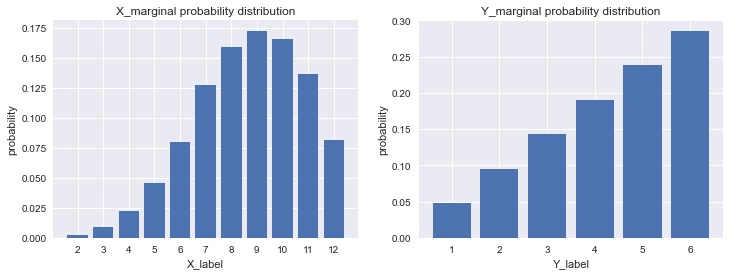

In [ ]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set,prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_label')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set,prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_label')
ax2.set_ylabel('probability')
ax2.set_xticks(y_set)

In [ ]:
# 2차원 이산형 확률분포의 지표
# 기댓값
np.sum([x_i * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

8.666666666666666

In [ ]:
sum = 0
for y_j in y_set:
    for x_i in x_set:
        sum += x_i * f_XY(x_i,y_j)
sum

8.666666666666666

In [ ]:
def E(XY,g):
    x_set,y_set, f_XY = XY
    return np.sum([g(x_i,y_j) * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

In [ ]:
mean_X = E(XY,lambda x,y:x)
mean_X

8.666666666666666

In [ ]:
mean_Y = E(XY,lambda x,y:y)
mean_Y

4.333333333333333

In [ ]:
a,b = 2,3

In [ ]:
E(XY,lambda x,y:a*x+b*y)

30.333333333333332

In [ ]:
# 분산 : X의 분산이라면 X에 관한 편차 제곱의 기댓값으로 구할 수 있다.
np.sum([(x_i-mean_X)**2 * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])


4.444444444444444

In [ ]:
# 분산의 함수
def V(XY, g):
    x_set,y_set, f_XY = XY
    mean = E(XY , g)
    return np.sum([(g(x_i,y_j) - mean)**2 * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

In [ ]:
var_X = V(XY, lambda x,y:x)
var_X

4.444444444444444

In [ ]:
var_Y = V(XY, lambda x,y:y)
var_Y

2.2222222222222223

In [ ]:
# 공분산
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY,lambda x,y:x)
    mean_Y = E(XY, lambda x,y:y)
    return np.sum([(x_i-mean_X)*(y_j-mean_Y)*f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])


In [ ]:
cov_xy = Cov(XY)
cov_xy

2.222222222222222

In [ ]:
V(XY, lambda x,y: a*x + b*y)

64.44444444444444

In [ ]:
# 분산과 공분산의 공식
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

64.44444444444443

In [ ]:
# 확률변수의 상관계수 : 공분산을 각각의 표준편차로 나누어 산출
cov_xy/ np.sqrt(var_X * var_Y)

0.7071067811865474

대표적인 이산형 확률분포

In [36]:
# 그래프를 위한 사용자 함수
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

linestyles = ['-','--',':']

def E(X,g=lambda x:x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X,g=lambda x:x):
    x_set, f = X
    mu = E(X,g)
    return np.sum([(g(x_k)-mu)**2*f(x_k) for x_k in x_set])

def check_prob(X): # 확률분포를 인수로 가지면 기댓값과 분산 계산 결과를 반환
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob>=0),'minus probability' # 조건을 만족하지 않으면 오류메세지 발생
    prob_sum = np.around(np.sum(prob),6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance {(V(X)):.4}')

def plot_prob(X): # 확률분포를 인수로 가지며 그 확률변수와 확률함수와 기대값을 그리기 위한 함수
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])

    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.bar(x_set,prob,label='prob',color = 'cornflowerblue')
    ax.vlines(E(X),0,1,label='mean',color='crimson')
    ax.set_xticks(np.append(x_set,E(X)))
    ax.set_ylim(0,prob.max()*1.2)
    ax.legend()
    plt.show()

#### 베르누이 분포
- 가장 기본적인 이상형 확률분포로 확률변수가 취할 수 있는 값이 0과 1밖에 없는 분포.
- 베르누이 분포를 따르는 확률변수의 시행을 베르누이 시행이라 하며 1이 나오면 성공, 0이 나오면 실패
- 동전을 던져 앞면이 나올 확률, 주사위를 한 번 굴려 6이 나오지 않을 확률

In [ ]:
def Bern(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p**x * (1-p)**(1-x)
        else:
            return 0
    return x_set,f

In [ ]:
p = 0.3
X = Bern(p)

In [ ]:
check_prob(X)

expected value 0.3
variance 0.21


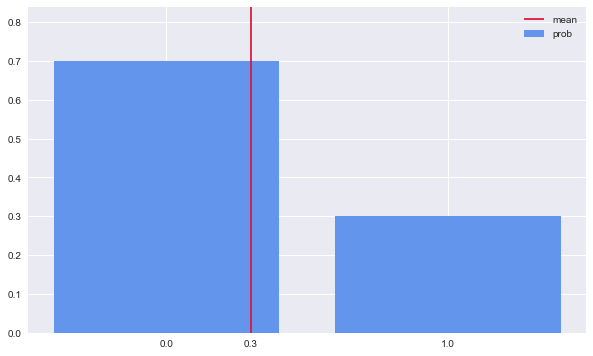

In [ ]:
plot_prob(X)

In [ ]:
rv = stats.bernoulli(p)

In [ ]:
# pmf 메서드는 확률함수를 계산할 수 있다.
rv.pmf(0),rv.pmf(1)

(0.7, 0.3)

In [ ]:
rv.pmf([0,1])

array([0.7, 0.3])

In [ ]:
# cdf 메서드는 누적밀도함수를 계한할 수 있다.
rv.cdf([0,1])

array([0.7, 1. ])

In [ ]:
rv.mean(),rv.var()

(0.3, 0.21)

#### 이항분포
- 성공확률이 p인 베르누이 시행을 n번 했을 때의 성공 횟수가 따르는 분포

f(x) = $_{n}\mathrm{C}_{x}p^x(1-p)^{n-x}$ $(x \in \{0,1,...,n\}$)

         0               (otherwise)
 

In [ ]:
# [과제] 사용자함수
from scipy .special import comb

def Bin(n,p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n,x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set,f

In [ ]:
# [과제] 동전을 10번 던져 앞면이 3번 나오는 확률의 이항분포의 기대값과 분산을 구하라.

# rv 메소드
rv = stats.binom(10, 3/10)
print(rv.mean(),rv.var())
# 그냥 하기..
Z = Bin(10,3/10)
check_prob(Z)

3.0 2.0999999999999996
expected value 3.0
variance 2.1


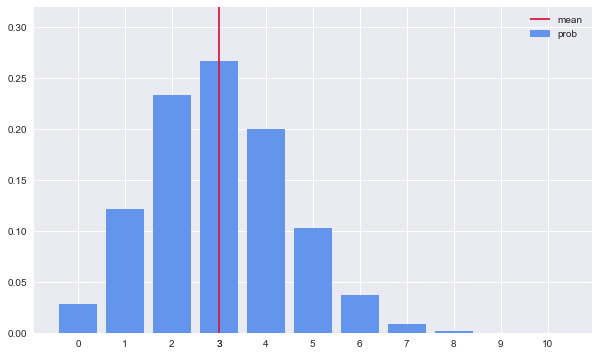

In [ ]:
# [과제] 상기 이항분포의 확률함수와 기댓값을 시각화 하세요
plot_prob(Z)

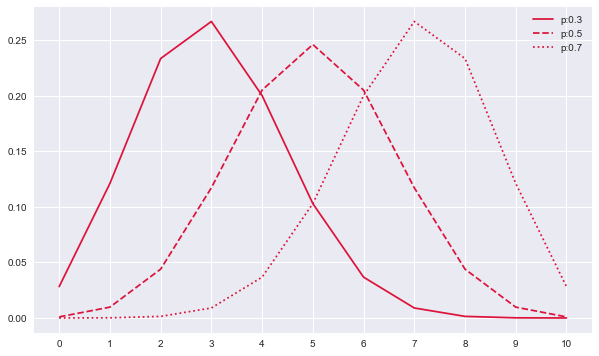

In [ ]:
# [과제] 확률이 0.3, 0.5, 0.7로 변할 때 확률함수가 변하는 모습을 시각화 하세요.
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(10+1)
for p, ls in zip([0.3,0.5,0.7], linestyles):
    rv = stats.binom(10,p)
    ax.plot(x_set, rv.pmf(x_set), label = f'p:{p}',ls=ls,color='crimson')
ax.set_xticks(x_set)
ax.legend()
plt.show()

#### 기하 분포
- 베르누이 시행에서 처음 성공할 때까지 반복한 시행 횟수가 따르는 분포
- 기하분포의 파라미터는 베르누이 시행의 성공 확률 파라미터 p가 되어 파라미터 p의 기하분포를 Ge(p)로 표기

f(x) = $(1-p)^{(x-1)}p$ $(x \in \{1,2,3,...\}$)

        0               (otherwise)
- 기하분포의 기대값과 분산 : $E(X) = 1/p, V(X) = (1-p)/p^2$

In [ ]:
# [과제] 사용자 함수를 구하세요.(단, 확률변수를 1이상 29이하인 정수로 설정)
def Ge(p):
    x_set = np.arange(1,30)
    def f(x):
        if x in x_set:
            return p * (1-p) ** (x-1)
        else:
            return 0
    return x_set, f

In [ ]:
# [과제] 성공확률이 0.5일 때 기하분포의 기대값과 분산을 구하세요.
Z = Ge(0.5)
check_prob(Z)

expected value 2.0
variance 2.0


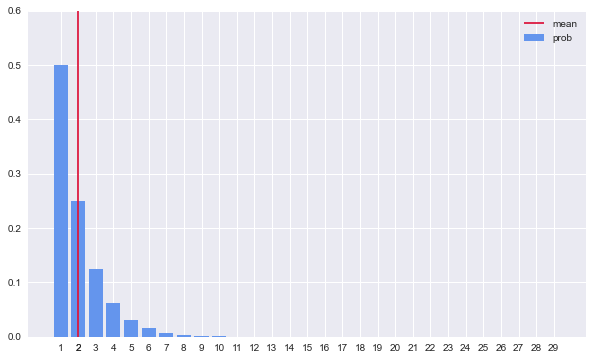

In [ ]:
# [과제] 상기 기하분포의 확률함수와 기대값을 시각화 하세요.
plot_prob(Z)

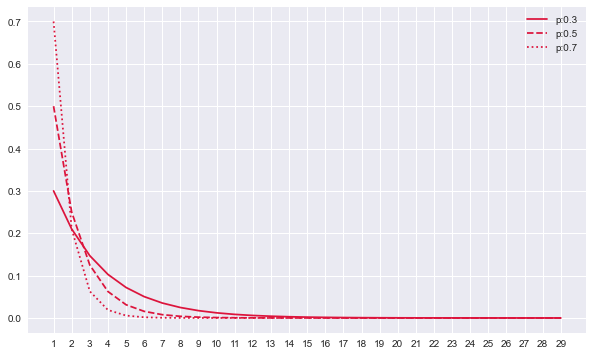

In [ ]:
# [과제] 성공확률이 0.3, 0.5, 0.8로 변할 때 확률함수가 변하는 모습을 시각화 하세요.
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(1,30)
for p, ls in zip([0.3,0.5,0.7], linestyles):
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set), label = f'p:{p}',ls=ls,color='crimson')
ax.set_xticks(x_set)
ax.legend()
plt.show()

#### 푸아송 분포
- 임의의 사건이 단위 시간당 발생하는 건수가 따르는 확률분포이며 포아송 분포의 파라미터는 $\lambda$로 나타낸다.
- 하루에 평균 2건의 교통사고가 발생하는 지역에서 하루 교통사고 발생건수는 Poi(2)를 따른다.  
        예) 하루에 교통사고가 한 건도 일어나지 않을 확률 : P(X=0) = 2!/0! * $e^{-2}$ = 0.135

- 포아송 분포의 기대값과 분산은 모두 $\lambda$가 된다.

f(x) = $\lambda^x/x!*e^{-\lambda}$ $(x \in \{0,1,2,...\})$
        0       (otherwise)

In [ ]:
# [과제] 사용자 함수를 구하세요. (단, 확률변수를 1이상 19이하인 정수로 설정)

def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam,x) / factorial(x) * np.exp(-lam)
        else:
            return 0
    return x_set, f

In [ ]:
# [과제] λ가 0.3일 때 포아송분포의 기대값과 분산을 구하세요.
X = Poi(3)
check_prob(X)

expected value 3.0
variance 3.0


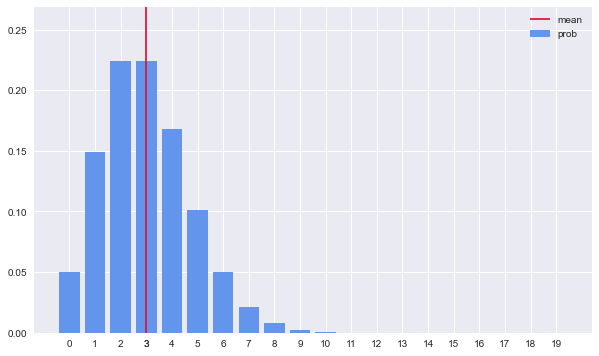

In [ ]:
# [과제] 상기 포아송분포의 확률함수와 기대값을 시각화 하세요.
plot_prob(X)

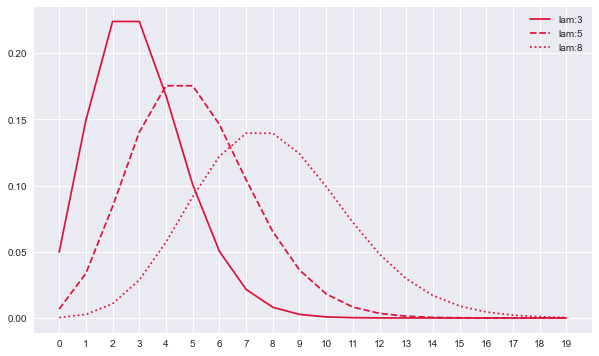

In [ ]:
# [과제] λ가 3, 5, 8로 변할 때 확률함수가 변하는 모습을 시각화 하세요.
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(20)
for lam, ls in zip([3,5,8], linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set), label = f'lam:{lam}',ls=ls,color='crimson')
ax.set_xticks(x_set)
ax.legend()
plt.show()

In [ ]:
# [과제] 베르누이, 이항, 기하, 포아송분포의 사례를 각각 2개씩 제시 및 설명

expected value 0.5
variance 0.25


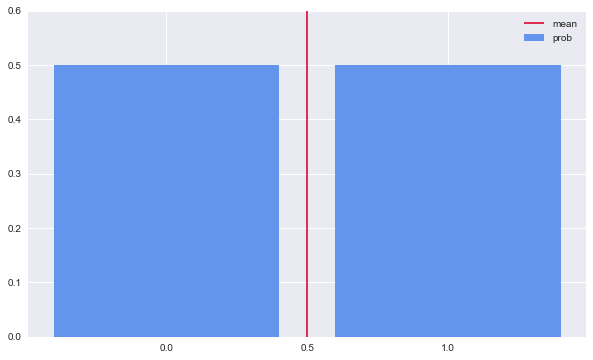

In [ ]:
# 베르누이 분포
# 당구장에서 선공을 결정하기 위해 동전을 던진다. 동전이 앞면이 나오면 선공. 즉, 이길 확률은 0.5
p = 0.5
X = Bern(p)
check_prob(X)
plot_prob(X)

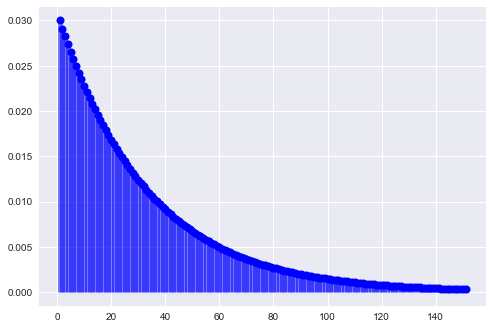

In [ ]:
# 기하분포
# 강해지고 싶은 남현이는 로스트아크의 장비를 강화시 성공할 떄까지 계속하게 된다...
# 무기 20강 -> 21강(3% 확률) 예시로 보겠다.
fig, ax = plt.subplots(1,1)
p = 0.03
# mean, var, skew, kurt = stats.geom.stats(p,moments='mvsk') # 앞의 요소들의 앞글자들 딴건데, 어느걸 볼건지 선택하는듯. 참고삼아 적어놓음
x = np.arange(stats.geom.ppf(0.01,p),stats.geom.ppf(0.99,p)) # ppf는 precent point function.
ax.plot(x,stats.geom.pmf(x,p), 'bo',ms=8,label='geom pmf') # 마커타입 bo, 크기 8
ax.vlines(x,0,stats.geom.pmf(x,p),colors='b',lw=5,alpha=0.5) # lw는 line width


## 장인의 기운 시스템
강화 실패 시, 다음 강화는 기본 재련확률의 10% 만큼 상승된 확률로 보정된다.(10번 제한)

<img src = './data/장인의기운2.png'>
출처: https://lostark.game.onstove.com/Library/Tip/Views/135268?page=4&libraryStatusType=0&librarySearchCategory=0&searchtype=0&searchtext=&ordertype=latest&LibraryQaAnswerType=None&UserPageType=0

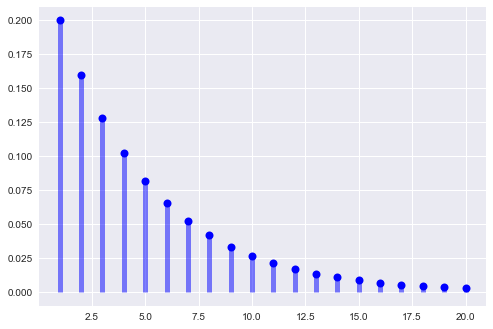

In [ ]:
# 연애를 길게 해본 적이 없는 남현이는 장기 연애를 포기해야 하나 생각이 들었다..
# 연애시 1년 넘기기.. 5번정도 하면 한번은 1년을 넘긴다고 가정합시다.
fig, ax = plt.subplots(1,1)
p = 0.2
# mean, var, skew, kurt = stats.geom.stats(p,moments='mvsk') # 앞의 요소들의 앞글자들 딴건데, 어느걸 볼건지 선택하는듯. 참고삼아 적어놓음
x = np.arange(stats.geom.ppf(0.01,p),stats.geom.ppf(0.99,p)) # ppf는 precent point function.
ax.plot(x,stats.geom.pmf(x,p),'bo',ms=8,label='geom pmf') # 마커타입 bo, 크기 8
ax.vlines(x,0,stats.geom.pmf(x,p),colors='b',lw=5,alpha=0.5)
# 적어도 20번은 하고 포기를 해야겠군요 ^^

연속형 확률변수
- 이산형 확률변수와 연속형 확률변수의 주된 차이는 확률변수가 취할 수 있는 값이 이산적인가 연속적인가이다.
- 연속형 확률변수의 경우 계산 과정에 적분이 포함된다. 적분은 SciPy의 integral 모듈을 사용하여 구현한다.

연속형 확률분포와 확률밀도함수
- 특정값이 될 확률은 0, 특정 값이 범위에 들어갈 확률은 확률밀도함수를 적분하여 계산(적분은 곡선 아래 면적 크기)
- 정규분포는 연속확률분포로 가장 자주 쓰이는 확률분포. 모양은 평균을 중심으로 하나의 봉우리 형태를 띄며 한 집단의 많은 사람들의 키, 몸무게, 시험성적등의 데이터에 잘 나타나는 분포
- 누적분포 함수: 확률분포에서 얻은 확률변수가 3 이하가 되는 확률. Cumulative density function
    * stats.norm.cdf(loc=4,scale=0.8,x=3)
- 정규분포의 확률밀도 계산
    * 확률변수 3일때의 확률밀도 N(3|4, 0.8**2)
    * stats.norm.pdf(loc=4, scale = 0.8,x=3) Probability density function
- 하측확률: '확률변수 x가 N보다 낮을 확률은 M퍼센트이다'에서 N을 고정하고 M을 구하는 경우
    * 이때의 M이 하측확률이며 M(확률)을 고정하고 N(변수)을 구하는 경우 이때의 N이 퍼센트포인트 하측확률의 2.5%가 되는 퍼센트 포인트
- stats.norm.pdf(x=x)로 하여 loc와 scale을 지정하지 않을 경우 표준정규분포가 됨. probability density function
- stats.norm.rvs() 함수는 정규확률분포로부터 난수 생성

Text(0.5, 1.0, '확률밀도함수')

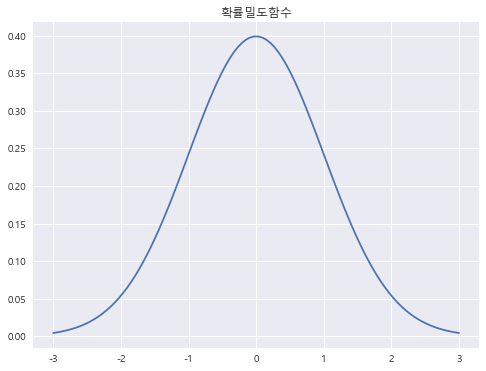

In [ ]:

rv = stats.norm(loc = 0,scale = 1)
xx = np.linspace(-3,3,100)
pdf = rv.pdf(xx)
plt.figure(figsize=(8,6))
plt.plot(xx,pdf)
plt.title('확률밀도함수')

Text(0.5, 1.0, '누적분포함수')

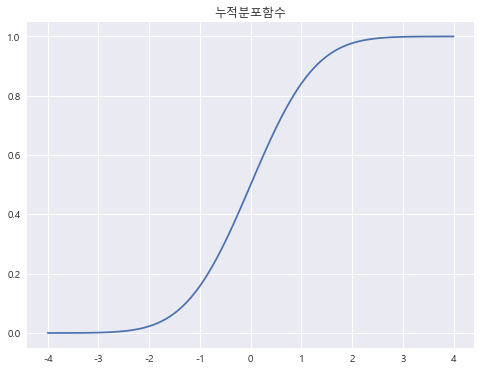

In [ ]:
xx = np.linspace(-4,4,100)
cdf = rv.cdf(xx)
plt.figure(figsize=(8,6))
plt.plot(xx,cdf)
plt.title('누적분포함수')

In [ ]:
x_range = np.array([0,1])

def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else:
        return 0
    
X = [x_range, f]

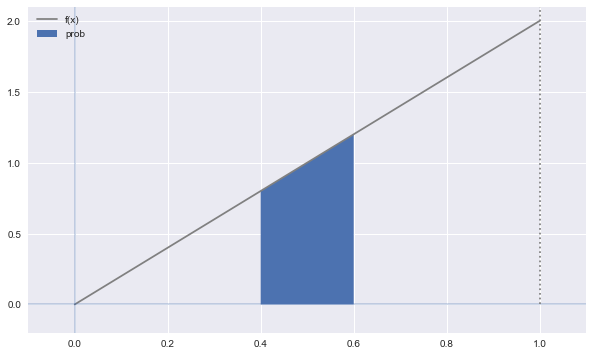

In [ ]:
xs = np.linspace(x_range[0], x_range[1],100)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
ax.hlines(0,-0.2,1.2,alpha=0.3)
ax.vlines(0,-0.2,2.2,alpha=0.3)
ax.vlines(xs.max(),0,2.2,linestyles=':',color='gray')
# 0.4 ~ 0.6 x좌표를 setting
xs = np.linspace(0.4,0.6,100)
ax.fill_between(xs,[f(x) for x in xs], label='prob')

ax.set_xticks(np.arange(-0.2, 1.3, 0.2))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()

plt.show()

In [ ]:
# 첫번째 인수는 피적분함수. 두번째 인수와 세번째 인수는 적분 범위
# quad 함수는 적분값과 추정오차를 반환 
integrate.quad(f,0.4,0.6)

(0.19999999999999996, 2.2204460492503127e-15)

연속형 확률변수에서는 확률의 성질이 수식을 만족해야 함
- f(x)가 항상 0이상의 값을 취함
- f(x)에 대하여 무한대 범위의 적분 결과는 1

In [ ]:
from scipy.optimize import minimize_scalar

res = minimize_scalar(f)
res.fun # 함수의 최솟값은 fun이라는 인스턴스 변수로 구함

0

In [ ]:
integrate.quad(f,-np.inf,np.inf)[0]

1.0

In [ ]:
# 정규분포의 확률밀도 계산
# 확률변수 3일때의 확률밀도 N(3|4.0,0.8**2)
x = 3
mu = 4
sigma = 0.8
1 / (np.sqrt(2 * np.pi * sigma**2)) * sp.exp(-((x-mu)**2)/(2*sigma**2))

C:\Users\admin\AppData\Local\Temp/ipykernel_6512/1773882514.py:6: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  1 / (np.sqrt(2 * np.pi * sigma**2)) * sp.exp(-((x-mu)**2)/(2*sigma**2))


0.22831135673627742

In [ ]:
# Q. 표준정규분포에서 확률변수가 1일때의 확률밀도를 구하세요.
stats.norm.pdf(loc = 0, scale = 1, x = 1)

0.24197072451914337

In [ ]:
# 정규분포 인스턴스 생성
norm_dist = stats.norm(loc=4,scale=0.8)
norm_dist.pdf(x=3)

0.2283113567362774

In [ ]:
x_plot = np.arange(1,7.1,0.1)
x_plot

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ])

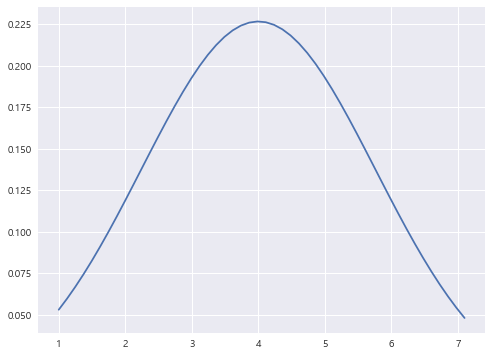

In [ ]:
mu = np.mean(x_plot)
std = np.std(x_plot)
rv = stats.norm(loc = mu,scale = std)
xx = np.linspace(1,7.1)
pdf = rv.pdf(xx)
plt.figure(figsize=(8,6))
plt.plot(xx,pdf)

In [ ]:
# 표본이 어떤 값 이하가 되는 비율
np.random.seed(1)
simulated_sample = stats.norm.rvs(loc=4,scale=0.8,size=100000)
simulated_sample

array([5.29947629, 3.51059487, 3.5774626 , ..., 4.06498025, 4.27523694,
       3.401955  ])

In [ ]:
pd.Series(simulated_sample).describe()

count    100000.000000
mean          4.004202
std           0.798667
min           0.538490
25%           3.465533
50%           4.004800
75%           4.539819
max           7.334494
dtype: float64

In [ ]:
# Q. 3보다 작은 샘플의 합계와 확률은?
a = pd.Series(simulated_sample)
a[a<=3].sum(), len(a[a<=3])/len(simulated_sample)

(27151.549504137874, 0.10371)

In [ ]:
# 누적분포함수 : 확률분포에서 얻은 확률변수 3이하가 되는 확률(loc=4,scale=0.8)
rv = stats.norm(loc=4,scale=0.8)
rv.cdf(3)

0.10564977366685535

In [ ]:
# 정규분포는 평균에 대해 좌우대칭
# 데이터가 평균값 이하가 될 확률은? 50%
stats.norm.cdf(loc=4,scale = 0.8,x=4)

0.5

In [ ]:
# 하측확률: '확률변수 X가 N보다 작을 확률은 M퍼센트이다' 에서 M을 고정하고 N을 구하는 경우
# q : 하측확률 -> 퍼센트포인트
stats.norm.ppf(loc=4,scale=0.8,q=0.025)

2.4320288123679563

In [ ]:
# x: 퍼센트포인트 -> 하측확률
stats.norm.cdf(loc=4,scale=0.8,x=2.4320288123679563)

0.024999999999999977

In [ ]:
# 하측확률이 50%가 되는 퍼센트포인트는 평균과 일치
stats.norm.ppf(loc=4,scale=0.8,q=0.5)

4.0

In [ ]:
# [과제] 평균 100, 표준편차 10인 정규분포에서 하측확률이 0.3인 ppf와 그걸 이용해 하측확률을 나타내시오
a = stats.norm.ppf(loc=100,scale=10,q=0.3)
print(a)
b = stats.norm.cdf(loc=100,scale=10,x=a)
print(b)

94.75599487291959
0.2999999999999998


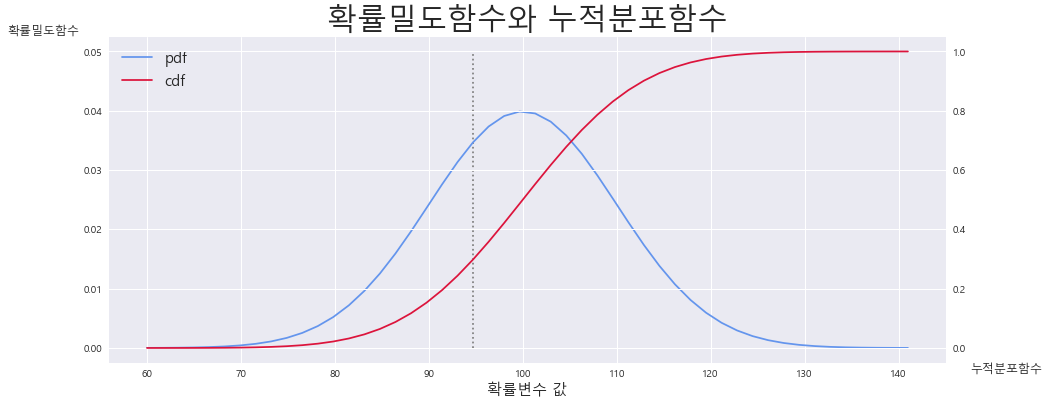

In [31]:
# [과제] 상기 정규분포의 확률밀도함수와 누적분포함수를 시각화하여 하측확률과 pp간의 관계를 확인
a = float(input('누적 확률이 M이되는 확률변수 값에 직선을 그려드리겠습니다. M을 입력하세요.(0~1사이)'))
rv = stats.norm(loc = 100,scale = 10)
xx = np.linspace(60,141)
pdf = rv.pdf(xx)
cdf = rv.cdf(xx)

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('확률밀도함수',rotation=0,fontsize=12,loc='top')
ax1.set_xlabel('확률변수 값',fontsize=15)
ax1.vlines(rv.ppf(a),0,0.05,colors='gray',ls = ':')
lns1 = ax1.plot(xx,pdf,label='pdf',color='cornflowerblue')

ax2 = plt.twinx(ax1)
lns2 = ax2.set_ylabel('누적분포함수',rotation=0,fontsize=12,loc='bottom')
lns2 = ax2.plot(xx,cdf,label='cdf',color='crimson')
lns = lns1 + lns2
lab = [i.get_label() for i in lns]
ax1.legend(lns,lab,loc='upper left',fontsize=15)

plt.title('확률밀도함수와 누적분포함수',fontsize=30)
plt.show()

### 표준정규분포에서 밑의 연습문제들을 해결해보자.

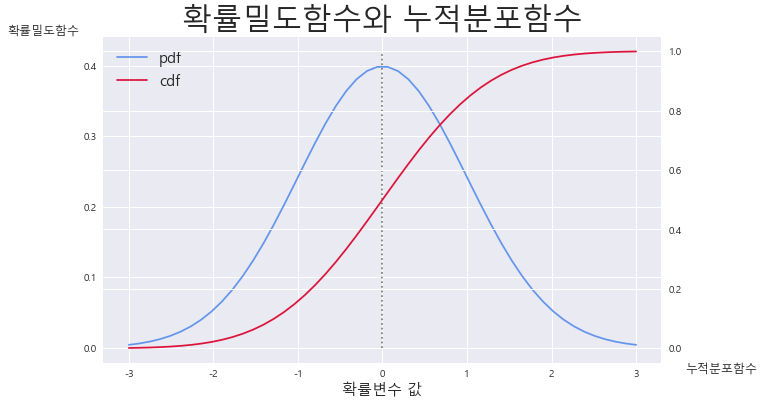

In [30]:
from matplotlib import rc
rc('font',family='Malgun Gothic') # 한글 인코딩
plt.rcParams['axes.unicode_minus'] = False # 음수 부분 처리

a = float(input('누적 확률이 M이되는 확률변수 값에 직선을 그려드리겠습니다. M을 입력하세요.(0~1사이)'))
rv = stats.norm(0,1)
xx = np.linspace(-3,3)
pdf = rv.pdf(xx)
cdf = rv.cdf(xx)

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('확률밀도함수',rotation=0,fontsize=12,loc='top')
ax1.set_xlabel('확률변수 값',fontsize=15)
ax1.vlines(rv.ppf(a),0,0.42,colors='gray',ls = ':')
lns1 = ax1.plot(xx,pdf,label='pdf',color='cornflowerblue')

ax2 = plt.twinx(ax1)
lns2 = ax2.set_ylabel('누적분포함수',rotation=0,fontsize=12,loc='bottom')
lns2 = ax2.plot(xx,cdf,label='cdf',color='crimson')
lns = lns1 + lns2
lab = [i.get_label() for i in lns]
ax1.legend(lns,lab,loc='upper left',fontsize=15)

plt.title('확률밀도함수와 누적분포함수',fontsize=30)
plt.show()

In [11]:
# Q. 0까지 누적분포
rv.cdf(0)

0.5

In [10]:
# Q. 누적분포가 0.5인 x값
rv.ppf(0.5)

0.0

In [15]:
# Q. 0 ~ 1까지의 누적확률분포
rv.cdf(1) - rv.cdf(0)

0.3413447460685429

In [17]:
# Q. (-2 < x < 2) 확률
rv.cdf(2) - rv.cdf(-2)

0.9544997361036416

In [18]:
# 상위 5% 확률의 퍼센트 포인트
rv.isf(0.05)

1.6448536269514729

In [19]:
# 하위 5% 확률의 퍼센트 포인트
rv.isf(0.95)

-1.6448536269514722

In [20]:
# 하위 5%, 상위 5%의 퍼센트 포인트
rv.interval(0.9)

(-1.6448536269514729, 1.6448536269514722)

Q. 어느 회사에서 종업원들의 근무시간을 조사하였는데 종업원들의 근무기간은 평균이 11년이고 표준편차가 4년인 정규분포를 따른다고 한다. 그럼 이회사에서 14년 이상 근무한 총입원의 비율을 구하세요.


In [21]:
rv = stats.norm(11,4)
1- rv.cdf(14)

0.22662735237686826

Q. 어느 전구회사의 전구의 수명은 평균 800일, 표준편차 30일인 정규분포를 따른다. 전구의 수명이 760일 이하일 확률을 구하시오.

In [22]:
rv = stats.norm(800,30)
rv.cdf(760)

0.09121121972586788

Q. 어느 고등학교 3학년 학생들의 수학 성적은 평균이 70점이고 분산이 64점인 정규분포를 따른다고 한다. 그럼 점수가 80점 이상이고 90점 이하일 확률을 구하세요.

In [23]:
rv = stats.norm(70,8)
rv.cdf(90)-rv.cdf(80)

0.09944010834107919

대표적인 연속형 확률분포

In [ ]:
linestyles = ['-','--',':']

def E(X,g=lambda x:x):
    x_range, f=X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand,-np.inf,np.inf)[0]

def V(X,g=lambda x:x):
    x_range, f=X
    mean = E(X,g)
    def integrand(x):
        return (g(x)-mean)** 2 *f(x)
    return integrate.quad(integrand,-np.inf,np.inf)[0]

def check_prob(X):
    x_range, f=X
    f_min = minimize_scalar(f).fun
    assert f_min>=0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f,-np.inf,np.inf)[0],6)
    assert prob_sum == 1, f'sum of probability is {prob_sum}'
    print(f'expected value {E(X):.3f}')
    print(f'variance {V(X):.3f}')

def plot_prob(X,x_min,x_max):
    x_range, f=X
    def F(x):
        return integrate.quad(f,-np.inf,x)[0]
    
    xs=np.linspace(x_min,x_max,100)
    fig = plt.figure(figsize=(10,6))
    ax=fig.add_subplot(111)
    ax.plot(xs,[f(x) for x in xs], label = 'f(x)',color='gray')
    ax.plot(xs,[F(x) for x in xs], label = 'F(x)',color='gray',ls=':')
    ax.legend()
    plt.show()

## 정규분포
- 통계분석에서 자주 사용되는 중요한 확률분포로 자연계에서 일어나는 수 많은 현상을 표현. 가우스 분포라고 부름
- 정규분포가 취할 수 있는 값은 실수 전체로 파라미터는 평균과 분산 두가지이다.

In [ ]:
def N(mu,sigma):
    x_range = [-np.inf,np.inf]
    def f(x):
        return 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-(x-mu)**2 / (2 * sigma**2))
    return x_range, f

In [ ]:
mu,sigma = 2,0.5
X = N(mu,sigma)
check_prob(X)

expected value 2.000
variance 0.250


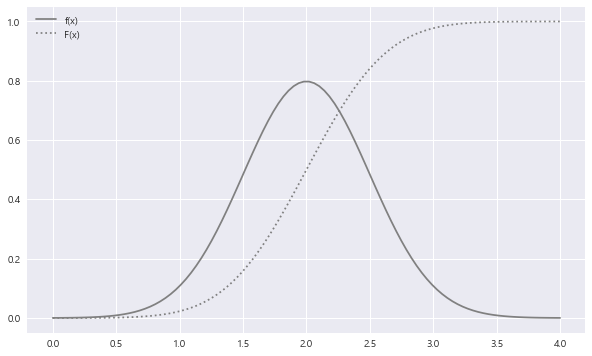

In [ ]:
plot_prob(X,0,4)

In [ ]:
rv = stats.norm(2,0.5)
print(rv.mean(),rv.var())

2.0 0.25


In [ ]:
# pp가 2일때 확률밀도
rv.pdf(2)

0.7978845608028654

In [ ]:
# pp가 2일때 하측확률
rv.cdf(2)

0.5

In [ ]:
# 상위 30% 점
rv.isf(0.3)

2.2622002563540207

In [ ]:
# 확률이 90%가 되는 가운데 부분의 구간을 구하세요
rv.interval(0.9)

(1.1775731865242636, 2.822426813475736)

In [ ]:
rv.isf(0.95),rv.isf(0.05)

(1.1775731865242638, 2.8224268134757367)

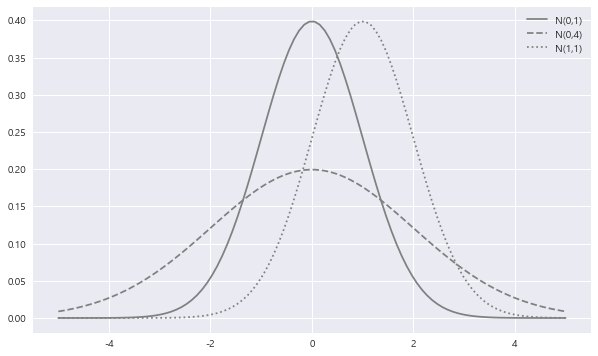

In [ ]:
# [과제] N(mean,sigma**2) 파라미터를 각각 (0,1), (0,4), (1,1)로 변경할 때의 정규분포를 시각화 하세요.
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(-5,5,100)
params = [(0,1),(0,2),(1,1)] # sigma 제곱이 4였는데, stats.norm에서 파라미터 sigma 자리에는 sigma가 들어가므로 2
for param, ls in zip(params,linestyles):
    mu,sigma = param
    rv = stats.norm(mu,sigma)
    ax.plot(xs,rv.pdf(xs), label=f'N({mu},{sigma**2})',ls=ls,color='gray')
ax.legend()
plt.show()

지수분포
- 어떤 사건이 발생하는 간격이 따르는 분포이며 확률변수가 취할 수 있는 값은 0이상의 실수
- 지수분포의 파라미터는 $\lambda$로 양의 실수이며 $EX(\lambda)$로 표기한다.

In [ ]:
def Ex(lam):
    x_range = [0,np.inf]
    def f(x):
        if x>= 0:
            return lam * np.exp(-lam * x)
        else:
            return 0
    return x_range,f

In [ ]:
lam = 3
X = Ex(lam)
check_prob(X)

expected value 0.333
variance 0.111


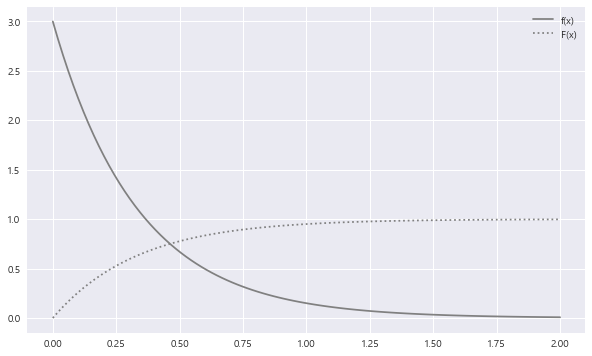

In [ ]:
plot_prob(X,0,2)

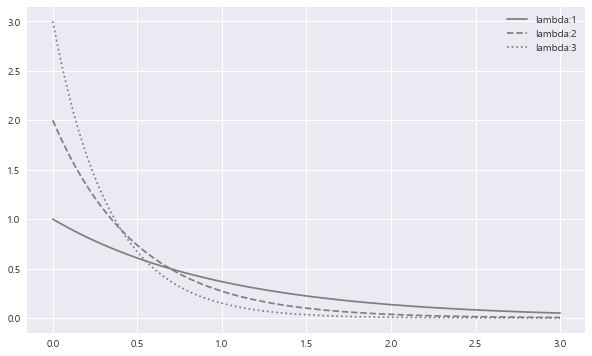

In [ ]:
# [과제] 파라미터 람다가 1,2,3으로 변경시 지수함수의 확률분포를 시각화 하세요.
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0,3,100)
for lam, ls in zip([1,2,3],linestyles):
    rv = stats.expon(scale=1/lam) # stats의 expon 분포는 파라미터 람다를 역수로 넣어야 함.
    ax.plot(xs,rv.pdf(xs), label=f'lambda:{lam}',ls=ls,color='gray')
ax.legend()
plt.show()

#### 카이제곱분포
- $Z_1, Z_2, ..., Z_n$이 서로 독립이고 N(0,1)을 따르고 있을 때 그 제곱합의 확률분포를 자유도가 n인 카이제곱분포라고 한다.
- 카이제곱분포는 분산의 구간 추정이나 독립성 검정에서 사용되는 확률분포이다.
- 좌우비대칭으로 왼쪽으로 치우치고 오른쪽으로 넓어진다.
- 자유도가 커지면 좌우대칭에 가까워진다.
- 자유도 값 가까이에 분포의 정점이 있다.

In [33]:
# 표본크기 10으로 백만번 무작위추출하여 카이제곱 분포를 따르는 표본 데이터를 만들 수 있음
n = 10
rv = stats.norm()
sample_size = int(1e6) # 1e6 -> 백만의 의미.. 1 * 10^6의 의미인데, 엑셀 등에서도 이렇게 나타남
Zs_sample = rv.rvs((n,sample_size))
chi2_sample = np.sum(Zs_sample**2,axis=0)

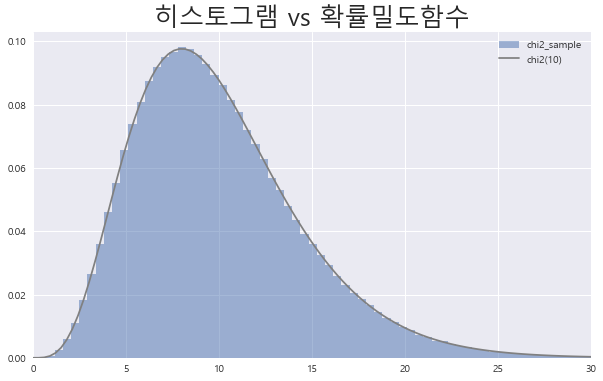

In [51]:
# 표본데이터의 히스토그램과 밀도함수를 시각화
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv_true = stats.chi2(n)
xs = np.linspace(0,30,100)
ax.hist(chi2_sample,bins=100,density=True, alpha=0.5,label='chi2_sample')
ax.plot(xs,rv_true.pdf(xs),label=f'chi2({n})', color='gray')

ax.legend()
ax.set_xlim(0,30)
plt.title('히스토그램 vs 확률밀도함수',fontsize = 25)
plt.show()

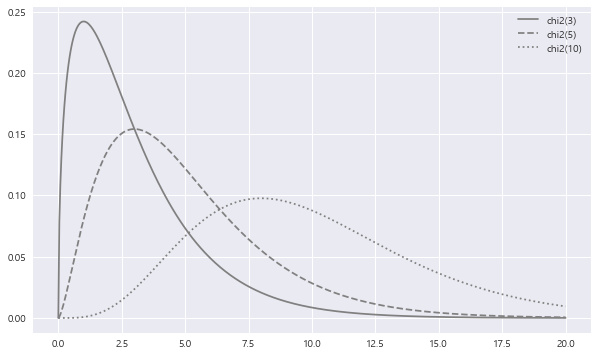

In [44]:
# 자유도가 3,5,10을 바뀔 때..?
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0,20,500)
for n, ls in zip([3,5,10],linestyles):
    rv = stats.chi2(n)
    ax.plot(xs,rv.pdf(xs),label=f'chi2({n})',ls=ls,color='gray')
ax.legend()
plt.show()

In [38]:
# 자유도 n=5일 때 상위 5%의 퍼센트 포인트
rv = stats.chi2(5)
rv.isf(0.05)

11.070497693516355

#### 카이제곱 검정의 예시  
https://www.jmp.com/ko_kr/statistics-knowledge-portal/chi-square-test/chi-square-test-of-independence.html


#### t 분포
- 정규분포에서 모평균의 구간추정 등에 사용되는 확률분포
- 확률변수 Z,Y는 서로 독립이고 Z는 표준정규분포 N(0,1)을, Y는 자유도가 n인 카이제곱분포 $\chi^2(n)$을 따를 때 t = ${Z}\over{\sqrt{{Y}\over{n}}}$의 확률분포를 자유도가 n인 t분포라고 한다.
- t분포의 의미
    * 모분산을 모르는 상황에서도 표본평균의 분포에 대하여 얘기할 수 있다.
    * t분포를 만들 때 표본에서 계산한 표준오차로 표본평균을 표준화함.
    * 표본에서 계산한 표준오차로 표본평균을 표준화했을 경우의 결과가 t분포를 따른다는 사실을 이용하면 얻어낸 표본평균에 관한 불확실성을 짐작할 수 있다.
- t분포의 특성
    * t분포는 모집단이 정규분포이더라도 분산 $\sigma^2$이 알려져 있지 않고 표본의 수가 적은 경우에 평균 $\mu$에 대한 신뢰구간 추정 및 가설검정에 아주 유용하게 쓰이는 분포이다.
    * t분포는 표준정규분포처럼 0을 중심으로 종형의 모습을 가진 대칭 분포이다.
    * t분포는 꼬리는 표준정규분포 보다 두껍다(fat tail)
    * t분포는 자유도 n에 따라 모습이 변하는데 자유도 n이 커짐에 따라 표준정규분포 N(0,1)에 수렴한다. 통상 모집단의 분산이 알려져 있지 않을 경우 표본분포를 결정할 때 표본의 크기가 ★30 이하이면 t분포를★, 그 크기가 30 이상이면 표준정규분포를 이용한다.

In [39]:
n = 10
rv1 = stats.norm()
rv2 = stats.chi2(n)

sample_size = int(1e6)
Z_sample = rv1.rvs(sample_size)
chi2_sample = rv2.rvs(sample_size)

t_sample = Z_sample / np.sqrt(chi2_sample/n)

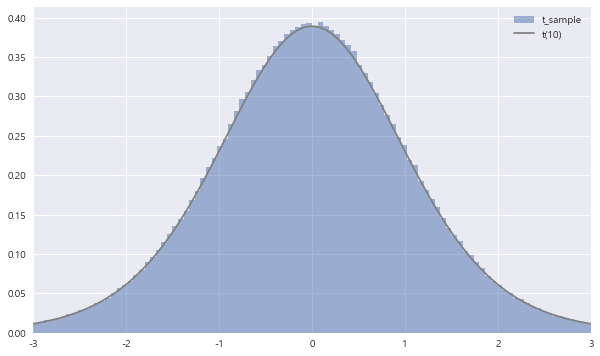

In [40]:
# 표본데이터의 히스토그램과 밀도함수
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.t(n)
xs = np.linspace(-3,3,100)
ax.hist(t_sample,bins=100,range=(-3,3),density=True,alpha=0.5,label='t_sample')
ax.plot(xs,rv.pdf(xs),label=f't({n})',color='gray')

ax.legend()
ax.set_xlim(-3,3)
plt.show()

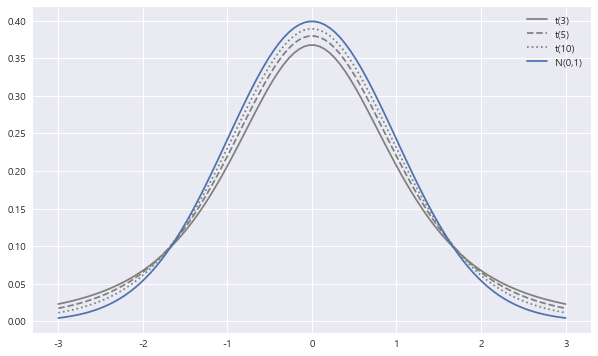

In [50]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(-3,3,100)
for n, ls in zip([3,5,10],linestyles):
    rv = stats.t(n)
    ax.plot(xs,rv.pdf(xs),label=f't({n})',ls=ls,color='gray')
rv = stats.norm()
ax.plot(xs,rv.pdf(xs),label='N(0,1)')

ax.legend()
plt.show()
# n이 커지면, t는 Z에 가까워지므로 점점 정규분포에 가까워진다.

In [42]:
rv = stats.t(5)
rv.isf(0.05)

2.0150483726691575

In [61]:
# 마크다운 분수 표현에서
# \over는 \over를 기준으로 왼쪽 전체를 분자, 오른쪽 전체를 분모로 만들어 줍니다
# \frac {분자}{분모} 로도 표현 가능하며,
# $F = \frac {Y_1/n_1}{Y_2/n_2}$ 처럼 나타낼 수 있습니다

#### F분포
- 확률변수 $Y_1, Y_2$는 서로 독립이고 각각 $Y_1$ ~ $\chi^2(n_1)$, $Y_2$ ~ $\chi^2(n_2)$를 따를 때,  
$F = \frac {Y_1/n_1}{Y_2/n_2}$ 의 확률분포를 자유도 $n_1,n_2$인 F분포 $F(n_1,n_2)$라고 한다.
- 좌우 비대칭으로 왼쪽으로 치우치고 오른쪽으로 넓어지는 분포이다.
- F분포가 취할 수 있는 값은 0 이상인 실수이며 분포의 정점은 1에 가깝다.

In [54]:
n1 = 5
n2 = 10
rv1 = stats.chi2(n1)
rv2 = stats.chi2(n2)

sample_size = int(1e6)
sample1 = rv1.rvs(sample_size)
sample2 = rv2.rvs(sample_size)

f_sample = (sample1/n1) / (sample2/n2)

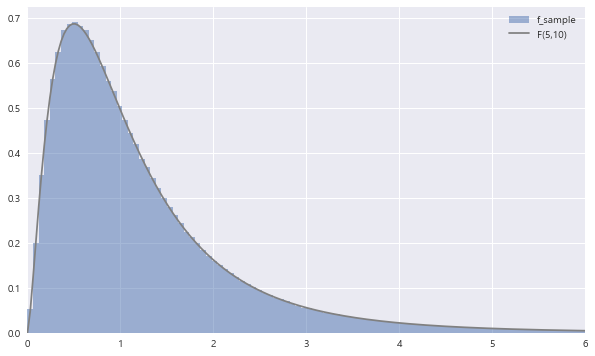

In [56]:
# 표본데이터의 히스토그램과 밀도함수
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

rv = stats.f(n1,n2)
xs = np.linspace(0,6,200)
ax.hist(f_sample,bins=100,range=(0,6),density=True,alpha=0.5,label='f_sample')
ax.plot(xs,rv.pdf(xs),label=f'F({n1},{n2})',color='gray')

ax.legend()
ax.set_xlim(0,6)
plt.show()

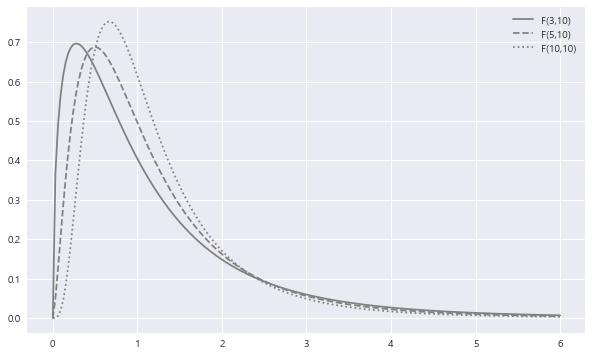

In [67]:
# n2를 10으로 고정하고 n1을 3,5,10으로 변화시킬 때 분포 형태를 시각화하여 비교
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0,6,200)
for n1,ls in zip([3,5,10],linestyles):
    rv = stats.f(n1,10)
    ax.plot(xs,rv.pdf(xs),label=f'F({n1},10)',ls=ls,color='gray')
ax.legend()
plt.show()

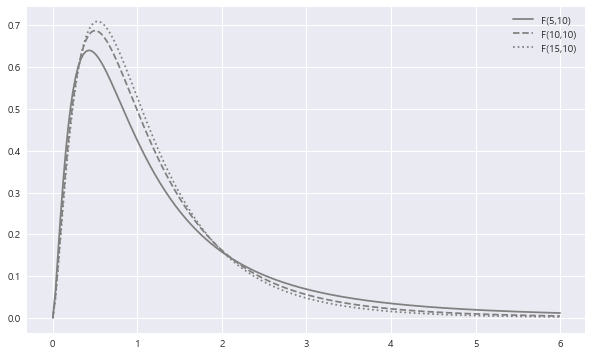

In [68]:
# n1를 5로 고정하고 n2을 5,10,15로 변화시킬 때 분포 형태를 시각화하여 비교
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0,6,200)
for n2,ls in zip([5,10,15],linestyles):
    rv = stats.f(5,n2)
    ax.plot(xs,rv.pdf(xs),label=f'F({n2},10)',ls=ls,color='gray')
ax.legend()
plt.show()

## 참고..
- https://math100.tistory.com/47 F분포표와 의미있는 구간
- 확률변수 F가 자유도 (n1,n2)인 F-분포를 다른다면,  
1/F는 자유도 (n2,n1)인 F-분포를 따른다
- 모분산이 각각 ${\sigma_1}^2, {\sigma_2}^2$인 정규모집단에서 서로 독립적으로 추출된 크기 $n_1, n_2$인 표본의 분산을 각각 ${S_1}^2, {S_2}^2$이라 할 때,  
$F =$ ${{S_1}^2{\sigma_2}^2}\over {{S_2}^2{\sigma_1}^2}$ 는 자유도가 $(n_1-1, n_2-1)$인 F-분포를 따른다.